In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import time
import re

In [3]:
data=pd.read_csv('flipkart_mobile.csv')

In [4]:
data.head()

,Unnamed: 0,Product,Price,Specification,Rating
0,1,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","₹10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
1,2,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","₹10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
2,3,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","₹10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
3,4,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","₹10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
4,5,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","₹10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3


In [7]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
data.head()

,Product,Price,Specification,Rating
0,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","₹10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
1,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","₹10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
2,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","₹10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
3,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","₹10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
4,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","₹10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        984 non-null    object 
 1   Price          984 non-null    object 
 2   Specification  984 non-null    object 
 3   Rating         984 non-null    float64
dtypes: float64(1), object(3)
memory usage: 30.9+ KB


In [13]:
data['Price']=data['Price'].apply(lambda x : x.replace('₹',''))

In [14]:
data

,Product,Price,Specification,Rating
0,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
1,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
2,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
3,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
4,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)","10,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3
...,...,...,...,...
979,"I Kall K525 (Gold, 64 GB)","7,499",4 GB RAM | 64 GB ROM | Expandable Upto 64 GB15...,3.3
980,"I Kall K525 (Gold, 64 GB)","7,499",4 GB RAM | 64 GB ROM | Expandable Upto 64 GB15...,3.3
981,"I Kall K525 (Gold, 64 GB)","7,499",4 GB RAM | 64 GB ROM | Expandable Upto 64 GB15...,3.3
982,"I Kall K525 (Gold, 64 GB)","7,499",4 GB RAM | 64 GB ROM | Expandable Upto 64 GB15...,3.3


In [15]:
data.Price=data.Price.apply(lambda x : x.replace(',','')).astype('float')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        984 non-null    object 
 1   Price          984 non-null    float64
 2   Specification  984 non-null    object 
 3   Rating         984 non-null    float64
dtypes: float64(2), object(2)
memory usage: 30.9+ KB


In [18]:
data.Specification[1]

'4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16.26 cm (6.4 inch) HD+ Display48MP + 8MP + 2MP + 2MP | 13MP Front Camera6000 mAh Lithium-ion BatteryMediaTek Helio G80 Processor1 Year Warranty Provided by the Manufacturer from Date of Purchase'

In [38]:
data['RAM']=data['Specification'].apply(lambda x : re.compile('\d+[\s\w]+RAM').findall(x))

In [51]:
data.isnull().sum()

Product          0
Price            0
Specification    0
Rating           0
RAM              0
ROM              0
Warranty         0
Size             0
dtype: int64

In [40]:
data["ROM"]=data['Specification'].apply(lambda x : re.compile('[0-9]+[\s\w]+ROM').findall(x))

In [62]:
data["Warranty"]=data['Specification'].apply(lambda x : re.compile('\d{1}[\s\w]+Warranty').findall(x))

In [63]:
data.head()

,Product,Price,Specification,Rating,RAM,ROM,Warranty,Size
0,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",10499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,4 GB RAM,64 GB ROM,[80 Processor1 Year Warranty],6.4 inch
1,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",10499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,4 GB RAM,64 GB ROM,[80 Processor1 Year Warranty],6.4 inch
2,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",10499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,4 GB RAM,64 GB ROM,[80 Processor1 Year Warranty],6.4 inch
3,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",10499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,4 GB RAM,64 GB ROM,[80 Processor1 Year Warranty],6.4 inch
4,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",10499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,4 GB RAM,64 GB ROM,[80 Processor1 Year Warranty],6.4 inch


In [49]:
data["Size"]=data['Specification'].apply(lambda x : re.compile('\d+\.\d+\s+inch').findall(x))

In [82]:
data

,Product,Price,Specification,Rating,RAM,ROM,Warranty,Size
0,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",10499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,4 GB RAM,64 GB ROM,80 Processor1 Year Warranty,6.4 inch
1,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",10499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,4 GB RAM,64 GB ROM,80 Processor1 Year Warranty,6.4 inch
2,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",10499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,4 GB RAM,64 GB ROM,80 Processor1 Year Warranty,6.4 inch
3,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",10499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,4 GB RAM,64 GB ROM,80 Processor1 Year Warranty,6.4 inch
4,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",10499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,4 GB RAM,64 GB ROM,80 Processor1 Year Warranty,6.4 inch
...,...,...,...,...,...,...,...,...
979,"I Kall K525 (Gold, 64 GB)",7499.0,4 GB RAM | 64 GB ROM | Expandable Upto 64 GB15...,3.3,4 GB RAM,64 GB ROM,Not Provided,6.26 inch
980,"I Kall K525 (Gold, 64 GB)",7499.0,4 GB RAM | 64 GB ROM | Expandable Upto 64 GB15...,3.3,4 GB RAM,64 GB ROM,Not Provided,6.26 inch
981,"I Kall K525 (Gold, 64 GB)",7499.0,4 GB RAM | 64 GB ROM | Expandable Upto 64 GB15...,3.3,4 GB RAM,64 GB ROM,Not Provided,6.26 inch
982,"I Kall K525 (Gold, 64 GB)",7499.0,4 GB RAM | 64 GB ROM | Expandable Upto 64 GB15...,3.3,4 GB RAM,64 GB ROM,Not Provided,6.26 inch


In [53]:
data['RAM']=data['RAM'].apply(lambda x : ''.join(x))

In [65]:
data['ROM']=data['ROM'].apply(lambda x : ''.join(x))
data['Warranty']=data['Warranty'].apply(lambda x : ''.join(x))
data['Size']=data['Size'].apply(lambda x : ''.join(x))

In [83]:
data.isnull().sum()

Product          0
Price            0
Specification    0
Rating           0
RAM              0
ROM              0
Warranty         0
Size             0
dtype: int64

In [78]:

# Replace on all selected columns
data['Warranty'] = data['Warranty'].mask(data['Warranty'] == '')



In [81]:
data=data.fillna('Not Provided')

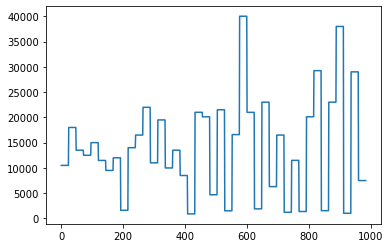

In [86]:
plt.plot(data.Price)[:10]

In [88]:
import matplotlib.style
matplotlib.style.use('ggplot')

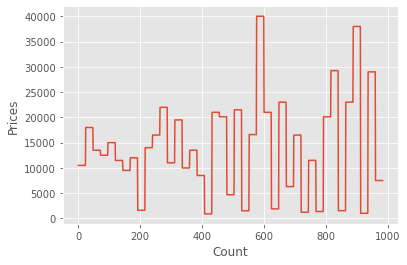

In [91]:
plt.ylabel('Prices')
plt.xlabel('Count')
plt.plot(data.Price)[:10]

([<matplotlib.patches.Wedge at 0x21eef0e9670>,
 [Text(1.0999968852755309, 0.002617705890749115, ''),
  Text(1.099971967585613, 0.007853058374639729, ''),
  Text(1.099922132770225, 0.013088232967050733, ''),
  Text(1.0998473819582508, 0.018323111078139824, ''),
  Text(1.099747716842984, 0.02355757412478074, ''),
  Text(1.099623139682089, 0.028791503533249472, ''),
  Text(1.0994736532975518, 0.03402478074191026, ''),
  Text(1.0992992610756138, 0.0392572872039013, ''),
  Text(1.0990999669666968, 0.044488904389820144, ''),
  Text(1.0988757754853118, 0.04971951379040866, ''),
  Text(1.0986266917099592, 0.0549489969192376, ''),
  Text(1.0983527212830113, 0.0601772353153906, ''),
  Text(1.0980538704105858, 0.06540411054614759, ''),
  Text(1.097730145862405, 0.07062950420966765, ''),
  Text(1.0973815549716421, 0.07585329793767105, ''),
  Text(1.0970081056347558, 0.08107537339812064, ''),
  Text(1.0966098063113106, 0.08629561229790228, ''),
  Text(1.096186666023786, 0.09151389638550465, ''),
  

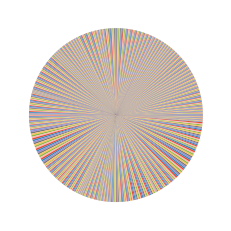

In [94]:
plt.pie(data.Price)[0:10]

([<matplotlib.patches.Wedge at 0x21ef212c9d0>,
 [Text(1.0461621663333946, 0.3399186987098808, '10499.0'),
  Text(0.6465637650236903, 0.8899187028927925, '10499.0'),
  Text(-2.5747358111484753e-08, 1.0999999999999999, '10499.0'),
  Text(-0.6465638066837905, 0.8899186726249574, '10499.0'),
  Text(-1.0461621822461362, 0.3399186497354952, '10499.0'),
  Text(-1.0461621504206509, -0.33991874768426583, '10499.0'),
  Text(-0.6465637233635886, -0.8899187331606258, '10499.0'),
  Text(7.724207457870327e-08, -1.0999999999999974, '10499.0'),
  Text(0.6465638483438898, -0.88991864235712, '10499.0'),
  Text(1.0461621981588753, -0.33991860076110864, '10499.0')])

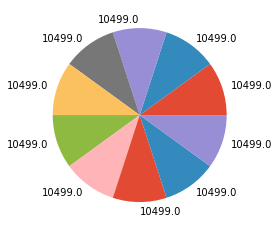

In [98]:
plt.pie(data.Price[900:910],labels=data.Price[0:10])

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([37978.5, 37978.6, 37978.7, 37978.8, 37978.9, 37979. , 37979.1,
        37979.2, 37979.3, 37979.4, 37979.5]),
 <BarContainer object of 10 artists>)

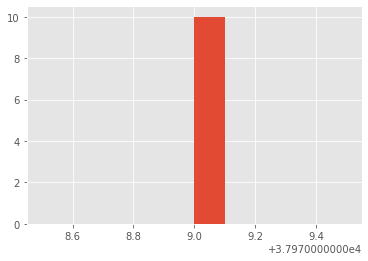

In [101]:
plt.hist(data.Price[900:910])

<BarContainer object of 10 artists>

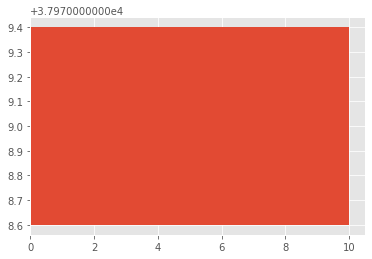

In [104]:
plt.barh(data.Price[900:910],range(1,11))

<AxesSubplot:xlabel='Product', ylabel='Price'>

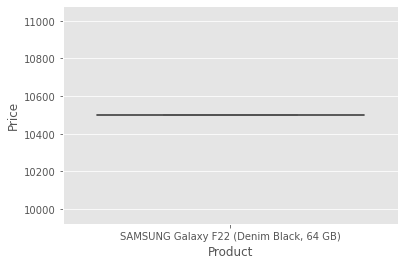

In [107]:
sns.boxplot(x=data['Product'][0:5],y=data['Price'][0:5])

<AxesSubplot:xlabel='count', ylabel='Product'>

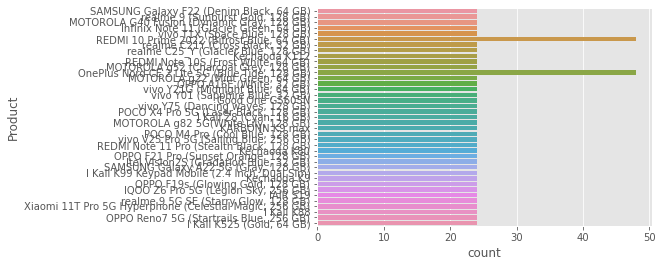

In [110]:
sns.countplot(y=data.Product,data=data)

In [111]:
corr=data.corr()

In [112]:
corr

,Price,Rating
Price,1.00000,0.11587
Rating,0.11587,1.00000


<AxesSubplot:>

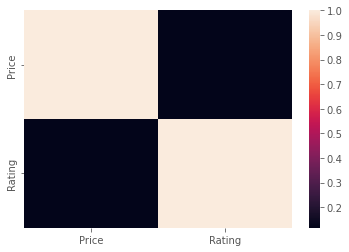

In [113]:
sns.heatmap()

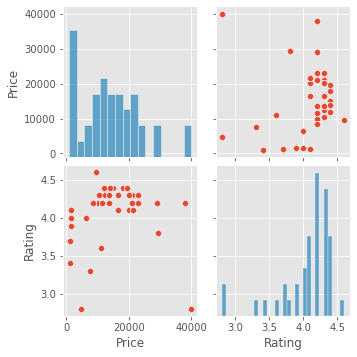

In [116]:
sns.pairplot(data)

<AxesSubplot:>

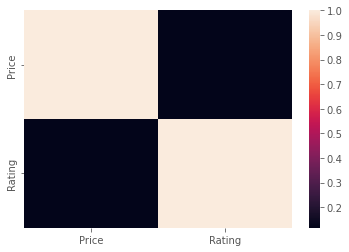

In [117]:
sns.heatmap(data.corr())